# Final Exam

## FINM 36700 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Instructions

## Please note the following:

Points
* The exam is 155 points.
* You have 180 minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Final Exam` assignment on Canvas, where you downloaded this. (Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers,) and it should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo--you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:
* `final_exam_data.xlsx`

This file has sheets for...
* `portfolio` (weekly) - Part 2
* `forecasting` (monthly) - Part 3
* `fx_carry`(daily) - Part 4

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.rolling import RollingOLS
from functools import partial
import sys
import math
pd.options.display.float_format = "{:,.4f}".format
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import os
from scipy.stats import norm

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [80]:
#import data
raw_data = pd.read_excel('/Users/yiningqu/Desktop/final_exam_data.xlsx',sheet_name = None)



#import data with multiple sheets
sheets = list(raw_data.keys())
forecasting = raw_data[sheets[1]].set_index('date')
fx_daily = raw_data[sheets[2]].set_index('date')


## Scoring

| Problem | Points |
|---------|--------|
| 1       | 40     |
| 2       | 25     |
| 3       | 50     |
| 4       | 40     |

### Each numbered question is worth 5 points unless otherwise specified.

### Notation
(Hidden LaTeX commands)

$$\newcommand{\betamkt}{\beta^{i,\text{MKT}}}$$
$$\newcommand{\betahml}{\beta^{i,\text{HML}}}$$
$$\newcommand{\betaumd}{\beta^{i,\text{UMD}}}$$
$$\newcommand{\Eri}{E\left[\tilde{r}^{i}\right]}$$
$$\newcommand{\Emkt}{E\left[\tilde{r}^{\text{MKT}}\right]}$$
$$\newcommand{\Ehml}{E\left[\tilde{r}^{\text{HML}}\right]}$$
$$\newcommand{\Eumd}{E\left[\tilde{r}^{\text{UMD}}\right]}$$

$$\newcommand{\frn}{\text{MXN}}$$
$$\newcommand{\frnrate}{\text{MXSTR}}$$
$$\newcommand{\FXspot}{S}$$
$$\newcommand{\fxspot}{\texttt{s}}$$
$$\newcommand{\rflogusd}{\texttt{r}^{\text{USD}}}$$
$$\newcommand{\rflogfrn}{\texttt{r}^{\frn}}$$

$$\newcommand{\wintt}{t,t+1}$$

$$\newcommand{\targ}{\text{USO}}$$

# 1. Short Answer

#### No Data Needed

These problems do not require any data file. Rather, analyze them conceptually. 

### 1.

Consider a Linear Factor Pricing Model (LFPM).

Which metric do we examine to understand its fit, (or errors)...
* given the estimated **time-series (TS)** test?
* given the estimated **cross-sectional (CS)** test?

For TS test, the alpha should be zero and R^2 doesn't matter
For CS test, the R^2 must be big and alpha doesn't matter



In a Linear Factor Pricing Model (LFPM), which is commonly used in finance to explain the returns of assets, we use different metrics to assess the model's fit or errors in both time-series (TS) and cross-sectional (CS) tests:

1. Time-Series (TS) Test:

In a time-series test, you are evaluating how well the LFPM fits the historical return data for a single asset or portfolio over time. The primary metric used to understand the fit or errors in the time-series test is:

a. R-squared (R²): R-squared measures the goodness of fit of the LFPM. It tells you the proportion of the variance in the asset's or portfolio's returns that can be explained by the factors in the model. A higher R-squared indicates a better fit, as it suggests that a larger portion of the return variation can be attributed to the factors in the LFPM.

A low R-squared in the time-series test may indicate that the LFPM is not capturing a significant portion of the asset's return variation, suggesting that the model may not be a good fit for explaining the asset's historical returns.

2. Cross-Sectional (CS) Test:

In a cross-sectional test, you are evaluating how well the LFPM fits the differences in returns across multiple assets or portfolios at a specific point in time. The primary metric used to understand the fit or errors in the cross-sectional test is:

b. Alpha (α): Alpha represents the excess return of an asset or portfolio above what would be expected based on the LFPM. In a well-fitted model, alpha should ideally be close to zero, indicating that there are no unexplained excess returns (positive or negative) after accounting for the factors in the model.

In a cross-sectional test, you examine the alphas of various assets or portfolios. If a significant number of assets or portfolios have consistently positive or negative alphas, it suggests that the LFPM is not adequately explaining the differences in returns among these assets, indicating a potential model inadequacy.

In summary, R-squared is used in the time-series test to assess how well the LFPM explains the historical returns of a single asset or portfolio over time. Alpha is used in the cross-sectional test to evaluate whether the LFPM adequately accounts for the differences in returns among multiple assets or portfolios at a specific point in time. These metrics help assess the model's fit and any errors in explaining asset returns in different contexts.

### 2.

Consider the Arbitrage Pricing Theory (APT). Is it fair to say that it is more likely to work for sets of assets with low cross-correlation? Why or why not?

The two assumption that APT made is first the residuals are uncorrelated and second the alpha should be zero. Also, it should have large R^2. This means that the low cross-correlation within the sets of assets doesn't matter a lot. However, it works for sets of asset with the following circumstances:  

The Arbitrage Pricing Theory (APT) is a financial theory used to explain the returns of assets based on a linear relationship with multiple systematic risk factors. A key assumption of APT is that assets' returns are influenced by common systematic factors rather than firm-specific factors. Therefore, APT can be more likely to work effectively for sets of assets with low cross-correlation among them. Here's why:
Systematic Risk Factors: APT posits that asset returns can be explained by systematic risk factors. These factors can include economic variables like interest rates, inflation rates, and market indices. When assets have low cross-correlation, it implies that they are less dependent on each other, and their returns are driven by different sets of systematic factors. In such a scenario, APT is more likely to be applicable because it can better capture the unique risk exposures of each asset.

Diversification Benefits: APT relies on the principle of diversification, which suggests that by combining assets with low correlation, an investor can reduce the overall risk (volatility) of a portfolio without sacrificing potential returns. When assets are not highly correlated, they tend to respond differently to changes in systematic factors. Therefore, a well-diversified portfolio constructed using APT can potentially provide better risk-adjusted returns.

Independent Sources of Risk: In a low cross-correlation environment, assets have relatively independent sources of risk. APT seeks to identify and quantify these systematic risk factors that affect asset returns. If assets were highly cross-correlated, it would be challenging to distinguish the impact of individual factors on their returns, making APT less effective.

However, it's important to note that APT is a theoretical model, and its effectiveness in practice depends on various assumptions and the quality of data used for factor estimation. APT assumes that there are no arbitrage opportunities in the market, and returns are generated based on the linear relationship with risk factors. Real-world markets can be more complex, with various sources of risk and correlations that may not always conform perfectly to APT assumptions.

In summary, APT is more likely to work effectively for sets of assets with low cross-correlation because it can better capture the distinct systematic risk exposures of each asset. Nevertheless, the real-world applicability of APT depends on various factors, and investors should consider the model's limitations and the specific characteristics of the assets and markets they are dealing with.

### 3.

In constructing momentum portfolios, we discussed selecting the top and bottom 10% of stocks, ranked by past returns. How do you think the strategy would be impacted if we were more extreme in the selection, and went long-short just the top / bottom 1% of total stocks?

Creating Momentum with a single top and bottom decile, leads to higher mean returns as we the construction concentrates the winners and losers, but also icreased idiosyncratic risk. However, a wider construction with 3 top and bottom deciles reduces the idiosyncratic risk as we have a broader range of securities and thus a more diversified portfolio. The strategy will generate higher return but with higher volatility compared to previous strategy.

### 4.

Over longer horizons, do investments have higher Sharpe ratios? How is this issue relevant to long-term asset allocators such as Barnstable?

Yes, over  longer horizons, investments have higher Sharpe Ratios.
<span style="color:00008B"> Barnstable proposed that if the assumption of log iid normally distributed returns hold, the mean return of any asset with grow linearly with time. However, the volatility of the asset will grow by a factor of $\sqrt{\text{time}}$.Thus according to their proposition the Sharpe ratio of an investment, which is mean return scaled by the volatility, should grow by a factor of $\sqrt{\text{time}}$. Thus an investment's sharpe ratio will always be greater for a long-term horizon.</span><br><br>
    
<center> <span style="color:#00008B">$\tau = \text{Long Horizon Time - Short Horizon Time}$ </span></center> <br>
    
<center> <span style="color:#00008B">$\tilde{r}_{\text{Long}} \approx \tilde{r}_{\text{Short}}*\tau$ </span></center> <br>
    
<center> <span style="color:#00008B">$\sigma_{\text{Long}} \approx \sigma_{\text{Short}}*\sqrt{\tau}$ </span></center> <br>

<center> <span style="color:#00008B">$\text{Sharpe}_{\text{Long}} =\frac{\tilde{r}_{\text{Long}} }{\sigma_{\text{Long}}} \approx  \frac{ \tilde{r}_{\text{Short}}*\tau}{\sigma_{\text{Short}}*\sqrt{\tau}} \approx \text{Sharpe}_{\text{Short}} *\sqrt{\tau}$ </span></center> <br>  




### 5.

Before it crashed, how did LTCM's performance compare to the S&P (SPY)? Was it an attractive investment? Be specific.

Before it crashes, LTCM has better performance compared to S&P. 

Here are the advantages of LTCM over others: 
Efficient financing: Their edge was on financing and funding, along with their proprietary trading and modelling capabilities.
Fund Size: They had a larger AUM(Assets Under Management), meaning they could lever at favorable rates
Collatralization: Better collatralize these positions. (pay lower haircuts)
Long-term Horizon: Long term commitment of capital from investors as well as availability of credit line
Liquidity and Hedging: LTCM has in place many mechanisms to ensure liquidity. They also avoid taking too much default risk or explicit directional bets.

Long-Term Capital Management (LTCM) was a hedge fund that experienced significant turmoil and ultimately collapsed in 1998. Before its crash, LTCM had a track record of strong performance, but this performance came with a substantial amount of risk. Let's compare LTCM's performance to the S&P 500 (represented by SPY) and evaluate whether it was an attractive investment:

Performance Comparison:

LTCM's performance was indeed impressive in its early years. The fund generated annualized returns well above traditional benchmarks like the S&P 500.
LTCM used complex trading strategies, including fixed income arbitrage, to capitalize on small price differentials in various financial instruments. These strategies leveraged the fund's capital to amplify returns.
Risk Profile:

While LTCM delivered strong returns, it did so with a high level of risk. The fund used significant leverage, often exceeding 25 times its capital, to magnify returns. This leverage greatly increased LTCM's exposure to market movements, making it vulnerable to substantial losses.
LTCM's trading strategies were based on statistical models that assumed historical patterns would continue. However, these models didn't account for extreme market events, such as the Russian financial crisis in 1998.
Attractiveness as an Investment:

LTCM may have appeared attractive to some investors due to its historical performance and the reputation of its founders, including Nobel laureates in economics. The allure of consistent high returns was appealing.
However, LTCM's high-risk profile, extensive leverage, and lack of diversification made it unsuitable for most investors, particularly those with a low tolerance for risk.
Many investors might not have fully understood the complexity of LTCM's strategies or the potential for catastrophic losses in adverse market conditions.
In summary, LTCM's performance was indeed impressive in terms of generating high returns, especially when compared to traditional benchmarks like the S&P 500. However, its attractiveness as an investment depends on an individual investor's risk tolerance and understanding of the fund's risk profile. The fund's eventual collapse in 1998 demonstrated the dangers of excessive leverage and overreliance on historical data in complex trading strategies, making it a cautionary tale in the world of finance. For most investors, LTCM's high-risk approach would not have been suitable, especially considering the significant losses it incurred during its downfall.

### 6.

Suppose investors are **not** mean-variance investors. If we find an investment with a Sharpe ratio higher than the "market", would this would be inconsistent with the CAPM?

The Capital Asset Pricing Model (CAPM) is a financial theory that relates the expected return of an asset to its systematic risk, typically measured by beta. 

Now, if investors are not mean-variance investors, it means they do not necessarily make investment decisions solely based on the risk-return trade-off as depicted by the CAPM. They may have preferences or constraints that lead them to consider factors beyond the CAPM, such as ethical considerations, liquidity needs, or specific investment objectives.

So, if you find an investment with a Sharpe ratio higher than the "market" (meaning it offers a better risk-adjusted return), it would not necessarily be inconsistent with the CAPM. The CAPM provides a theoretical framework for pricing assets based on their systematic risk, but it does not account for all the factors that investors may consider when making investment decisions.

Investors may be willing to accept a lower expected return for an investment if it aligns with their preferences or constraints, even if the CAPM suggests that the expected return should be higher based on systematic risk. Conversely, they may be attracted to an investment with a higher Sharpe ratio if it offers a better risk-adjusted return, regardless of whether the CAPM predicts this outcome.

In summary, the CAPM provides a foundation for understanding the relationship between expected return and systematic risk, but it does not encompass all factors that influence investment decisions. Investors' preferences and constraints can lead them to consider investments with Sharpe ratios that differ from what the CAPM would predict.

### 7.

What causes us concern about the performance of classic mean-variance optimization out-of-sample?

What is one of the potential solutions we discussed?


Small changes in mean returns of underlying assets have large impact on the weights of the mean-variance optimized portfolio. The tangency portfolio weights are sensitive to changes in mean return due to the nature of the inverted covariance matrix.

We discussed using Ridge and LASSO would address the extereme weights produced by the mean-variance optimization by penalizing the objective function, (equivalently by regularizing the covariance matrix, which improves the stability of its inverse.). Generally, regularizing/diagonalizing the covariance matrix would stabalize its inversion.


### 8.

True or False: Uncovered Interest Parity implies Covered Interest Parity, but not vice-versa.

Explain.

**Solution:** UIP relates expected FX growth to interest rate differential:  </span><br><br>
    
<center> <span style="color:#00008B">$ln \mathop{\mathbb{E}}_{t}[S_{t+1}] - s_{t} = r_{t+1}^{\text{f,\$}} - r_{t+1}^{\text{f,£}} $</span></center> <br>  

<span style="color:#00008B"> We can rewrite the UIP condition, using CIP to sub out the interest rate differential for the forward premium.</span><br><br> 

<center> <span style="color:#00008B">$ln \mathop{\mathbb{E}}_{t}[S_{t+1}] - s_{t} = f_{t}^{s} - s_{t}$</span></center> <br> 

<span style="color:#00008B"> Thus, neither implies the other. CIP is a no-arbitrage relationship of forward rates vs spot rates. UIP is a hypothesis that FX risk does not earn a premium; in other words, expected excess returns of FX are zero. The theory does not imply the no-arbitrage relationship, nor vice-versa. It is true that sometimes we use the CIP relationship to insert into UIP to write it in a different form, but this is not enough to prove UIP; it is simply restating it in terms of forward rates.</span><br><br> 




***

# 2. Optimization

Use the data found in the `portfolio` tab. it is weekly data.

### 1.

Assume the provided data is in terms of **excess** returns.

Report the weights of the tangency portfolio.

Report the weights of the MV portfolio which achieves a mean weekly return of `0.0025`.


### 2.

Assume the provided data is in terms of **total** returns.

Report the weights of the GMV portfolio

Report the weights of the MV portfolio which achieves a mean weekly return of `0.0025`.

In [132]:
portfolio = raw_data[sheets[0]].set_index('date')

In [150]:
def tangency_weights(returns, cov_mat = 1):
    
    if cov_mat ==1:
        cov_inv = np.linalg.inv((returns.cov()*12))
    else:
        cov = returns.cov()
        covmat_diag = np.diag(np.diag((cov)))
        covmat = cov_mat * cov + (1-cov_mat) * covmat_diag
        cov_inv = np.linalg.inv((covmat*12))  
        
    ones = np.ones(returns.columns[0:].shape) 
    mu = returns.mean()*12
    scaling = 1/(np.transpose(ones) @ cov_inv @ mu)
    tangent_return = scaling*(cov_inv @ mu) 
    tangency_wts = pd.DataFrame(index = returns.columns[0:], data = tangent_return, columns = ['Tangent Weights'] )
        
    return tangency_wts

In [152]:
w_t = tangency_weights(portfolio)
w_t

,Tangent Weights
SPY,0.8576
BTC,0.1417
USO,-0.0431
TLT,-0.0405
IEF,0.1674
IYR,-0.4408
GLD,0.3577


In [153]:
def gmv_weights(tot_returns):
    
    ones = np.ones(tot_returns.columns[0:].shape)
    cov = tot_returns.cov()*12
    cov_inv = np.linalg.inv(cov)
    scaling = 1/(np.transpose(ones) @ cov_inv @ ones)
    gmv_tot = scaling * cov_inv @ ones
    gmv_wts = pd.DataFrame(index = tot_returns.columns[0:], data = gmv_tot, columns = ['GMV Weights'] )

    
    return gmv_wts


In [154]:
def mv_portfolio(target_ret, tot_returns):
    
    mu_tan = tot_returns.mean() @ tangency_weights(tot_returns, cov_mat = 1)
    mu_gmv = tot_returns.mean() @ gmv_weights(tot_returns)
    
    delta = (target_ret - mu_gmv[0])/(mu_tan[0] - mu_gmv[0])
    mv_weights = (delta * tangency_weights(tot_returns, cov_mat = 1)).values + ((1-delta)*gmv_weights(tot_returns)).values
    
    MV = pd.DataFrame(index = tot_returns.columns[0:], data = mv_weights, columns = ['MV Weights'] )
    MV['tangency weights'] =  tangency_weights(tot_returns, cov_mat = 1).values
    MV['GMV weights'] =   gmv_weights(tot_returns).values


    return MV

In [155]:
mv_portfolio(0.0025, portfolio)

,MV Weights,tangency weights,GMV weights
SPY,0.4990,0.8576,0.0921
BTC,0.0749,0.1417,-0.0010
USO,-0.0216,-0.0431,0.0027
TLT,-0.2450,-0.0405,-0.4770
IEF,0.7575,0.1674,1.4270
IYR,-0.2536,-0.4408,-0.0411
GLD,0.1888,0.3577,-0.0028


### 3.

Conceptually, what is the difference between the portfolios in part 1 and part 2?

Mathematically, what is the difference in their optimizations?


MV Weights: These weights represent the allocations in a Mean-Variance (MV) portfolio, which aims to find the balance between risk and return while maximizing return for a given level of risk.

Tangency Weights: These weights are for a Tangency Portfolio, which focuses on maximizing the Sharpe ratio. It allocates assets to optimize the risk-adjusted return.

GMV Weights: These weights correspond to a Global Minimum Variance (GMV) portfolio, which seeks to minimize portfolio risk (volatility) without explicitly targeting returns. It prioritizes assets with low correlation to reduce overall portfolio risk.


Part 1 - Excess Returns:

Tangency Portfolio: This portfolio aims to maximize the risk-adjusted return, specifically the Sharpe ratio. It considers the trade-off between risk (measured by the portfolio's volatility) and return (measured by the expected excess return). The tangency portfolio seeks to find the allocation that provides the highest Sharpe ratio.
MV Portfolio with Mean Weekly Return of 0.0025: This portfolio has a specific target return of 0.0025 (weekly), and it aims to find the allocation that achieves this target return while minimizing risk. It does not necessarily maximize the Sharpe ratio, but it seeks to meet the specified return requirement.

Part 2 - Total Returns:

GMV Portfolio: The Global Minimum Variance (GMV) portfolio aims to minimize the portfolio's overall risk (volatility) without considering returns. It seeks to find the allocation that provides the lowest possible risk among all possible portfolios.
MV Portfolio with Mean Weekly Return of 0.0025: Similar to Part 1, this portfolio also has a specific target return of 0.0025 (weekly), but it aims to find the allocation that achieves this target return while balancing risk. It takes into account the trade-off between risk and return.
Mathematically, the optimizations for these portfolios differ in their objective functions and constraints:

Tangency Portfolio (Part 1 - Excess Returns):

Objective Function: Maximize the Sharpe ratio, which is defined as (expected excess return / portfolio volatility).
Constraint: The weights must sum up to 1.
MV Portfolio with Target Return (Part 1 - Excess Returns):

Objective Function: Find the portfolio weights that meet the specified target return while minimizing risk (portfolio volatility).
Constraint: The weights must sum up to 1, and the expected portfolio return should equal the specified target return.

GMV Portfolio (Part 2 - Total Returns):

Objective Function: Minimize portfolio risk (portfolio volatility).
Constraint: The weights must sum up to 1.
MV Portfolio with Target Return (Part 2 - Total Returns):

Objective Function: Find the portfolio weights that meet the specified target return while balancing risk (portfolio volatility).
Constraint: The weights must sum up to 1, and the expected portfolio return should equal the specified target return.

SPY: In the MV and Tangency portfolios, SPY has a relatively high allocation, suggesting that it's expected to provide a higher return relative to risk in these portfolios. In contrast, the GMV portfolio allocates a much smaller weight to SPY, focusing on risk reduction.

BTC: MV and Tangency portfolios allocate a moderate weight to BTC, indicating its potential for return. However, the GMV portfolio allocates a negligible weight to BTC, prioritizing lower-risk assets.

USO: MV, Tangency, and GMV portfolios allocate varying weights to USO. The GMV portfolio allocates a slightly higher weight to USO compared to the other two portfolios.

TLT: In all portfolios, TLT has relatively lower allocations. The GMV portfolio allocates the lowest weight to TLT, emphasizing risk reduction.

IEF: IEF receives a significant allocation in the GMV portfolio, suggesting it is considered a low-risk asset. In contrast, the MV and Tangency portfolios allocate less to IEF.

IYR: IYR has a negative allocation in both the Tangency and GMV portfolios, indicating these portfolios might short or underweight this asset. In contrast, it has a positive allocation in the MV portfolio.

GLD: GLD receives moderate allocations in both the MV and Tangency portfolios. However, the GMV portfolio allocates a negligible weight to GLD, focusing on risk reduction.

In summary, the differences in portfolio weights reflect the distinct objectives of each portfolio strategy. The MV portfolio seeks a balance between risk and return, the Tangency portfolio maximizes the risk-adjusted return, and the GMV portfolio prioritizes risk reduction. These differences lead to varying allocations to different assets based on their expected risk and return profiles.

### 4.

#### (10pts)

Consider the following:
* drop `BTC` from the sample
* target a weekly mean return of `.0025`.
* assume once again that the provided data is **excess** returns.

Using data only through 2021, 
* calculate the tangency weights
* compute the performance of this tangency portfolio in the out-of-sample (OOS) period of 2022-2023.

Report the
* mean
* vol
* Sharpe

Compare these three metrics with the equally-weighted portfolio for 2022-2023.

In [301]:
portfolio_new = portfolio.drop(['BTC'], axis=1)

excess_returns_IS = portfolio_new[:'2021'].reset_index()
excess_returns_OOS = portfolio_new['2022':].reset_index()


excess_returns_in_sample = excess_returns_IS[excess_returns_IS.columns[1:]] 
excess_returns_out_of_sample = excess_returns_OOS[excess_returns_OOS.columns[1:]] 

In [297]:
target_mean = 0.0025
wts_IS = pd.DataFrame(index = excess_returns_IS.columns[1:], columns = ['tangency with BTC dropped'
                                                                        ,'equal weights'])
IS_tangency_weights_wo_TIPS = tangency_weights(portfolio_new , cov_mat = 1)
wts_IS.loc[:,'tangency with BTC dropped'] = IS_tangency_weights_wo_TIPS.values
wts_IS.loc[:,'equal weights'] = 1/len(excess_returns_in_sample)


wts_IS *= target_mean / (excess_returns_IS.mean().iloc[1:] @ wts_IS)
wts_IS

,tangency with BTC dropped,equal weights
SPY,0.8151,0.2424
USO,-0.0292,0.2424
TLT,0.0103,0.2424
IEF,0.0599,0.2424
IYR,-0.4037,0.2424
GLD,0.3829,0.2424


In [298]:
def performance(return_data, period = 52):
    """ 
        Returns the Performance Stats for given set of returns
        Inputs: 
            return_data - DataFrame with Date index and Monthly Returns for different assets/strategies.
        Output:
            summary_stats - DataFrame with annualized mean return, vol, sharpe ratio. Skewness, Excess Kurtosis, Var (0.5) and
                            CVaR (0.5) and drawdown based on monthly returns. 
    """
    summary_stats = return_data.mean().to_frame('Mean').apply(lambda x: x*period)
    summary_stats['Volatility'] = return_data.std().apply(lambda x: x*np.sqrt(period))
    summary_stats['Sharpe Ratio'] = summary_stats['Mean']/summary_stats['Volatility']
    summary_stats['Skewness'] = return_data.skew()
    summary_stats['Excess Kurtosis'] = return_data.kurtosis()
    summary_stats['VaR (0.05)'] = return_data.quantile(.05, axis = 0)
    summary_stats['CVaR (0.05)'] = return_data[return_data <= return_data.quantile(.05, axis = 0)].mean()
    summary_stats['Min'] = return_data.min()
    summary_stats['Max'] = return_data.max()
    
    return summary_stats

In [299]:
performance(portfolio_new @ wts_IS)

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Min,Max
tangency with BTC dropped,0.1143,0.1025,1.1144,0.0318,2.1928,-0.0211,-0.0289,-0.0626,0.0591
equal weights,0.0960,0.1708,0.5621,-1.5905,9.7415,-0.0331,-0.0585,-0.1590,0.0800


### The data is annualized from weekly to annually 

***

# 3.

Forecast (total) returns on gold as tracked by the ETF ticker, $\targ$. This ETF holds crude oil.

As signals, use two interest rate signals, as seen in Treasury-notes. (No need to consider anything specific about Treasury notes, just read these as macroeconomic signals.)
* Tnote rate
* month-over-month change in the Tnote rate

Find the all data needed for this problem in the sheet `forecasting`.

### 1.

Estimate a forecasting regression of $\targ$ on the two (lagged) signals.

$$r_{t+1}^\targ = \alpha + \beta^{x}x_t + \beta^z z_t + \epsilon_{t+1}$$

where
* $x$ denotes the interest-rate signal.
* $z$ denotes the change in rate signal.

Report the r-squared, as well as the OLS estimates for the intercept and the two betas. (No need to annualize the stats.)

In [267]:
def regression_based_performance(factor,fund_ret,rf,constant = True,annualization = 12):
    """ 
        Returns the Regression based performance Stats for given set of returns and factors
        Inputs:
            factor - Dataframe containing monthly returns of the regressors
            fund_ret - Dataframe containing monthly excess returns of the regressand fund
            rf - Monthly risk free rate of return
        Output:
            summary_stats - (Beta of regression, treynor ratio, information ratio, alpha). 
    """
    if constant:
        X = sm.tools.add_constant(factor)
    else:
        X = factor
    y=fund_ret
    model = sm.OLS(y,X,missing='drop').fit()
    
    if constant:
        beta = model.params[1:]
        alpha = round(float(model.params['const']),6)
        
    else:
        beta = model.params
    treynor_ratio = ((fund_ret.values-rf).mean()*annualization)/beta[0]
    tracking_error = (model.resid.std()*np.sqrt(annualization))
    if constant:        
        information_ratio = model.params[0]*annualization/tracking_error
    r_squared = model.rsquared
    if constant:
        return (beta,treynor_ratio,information_ratio,alpha,r_squared,tracking_error)
    else:
        return (beta,treynor_ratio,r_squared,tracking_error)

In [268]:
def rolling_regression_param(factor,fund_ret,roll_window = 60):
    """ 
        Returns the Rolling Regression parameters for given set of returns and factors
        Inputs:
            factor - Dataframe containing monthly returns of the regressors
            fund_ret - Dataframe containing monthly excess returns of the regressand fund
            roll_window = rolling window for regression
        Output:
            params - Dataframe with time-t as the index and constant and Betas as columns
    """
    X = sm.add_constant(factor)
    y= fund_ret
    rols = RollingOLS(y, X, window=roll_window)
    rres = rols.fit()
    params = rres.params.copy()
    params.index = np.arange(1, params.shape[0] + 1)
    return params
    

In [269]:
def calc_probability_lowret(num_years,mean_ret_check,mean_ret,vol):
        """ 
        Returns the Probability that the cumulative market return will fall short of the cumulative
        risk-free return for each period
        Inputs: 
            mean - annualized mean returns of market for a period.
            vol - annualized volatility of returns for a period
            num_years - Number of years to calculate
        Output:
            probability - DataFrame with probability for each period (step = 1)
        """
        lst = []
        for n in range (0,num_years+1,1):
            norm_val = np.sqrt(n)*(mean_ret_check - mean_ret)/(vol)
            prob = (norm.cdf(norm_val))*100
            lst.append(pd.DataFrame([[n,prob]],columns=['Time','Probability(%)']))
        probability = pd.concat(lst)
        return probability

In [270]:
fund_ret = forecasting.loc[:,['USO']]
signal = ['Tnote rate','Tnote rate change']

factor = forecasting.loc[:,signal].shift(1)
reg = regression_based_performance(factor,fund_ret,0)
reg_params = []
columns=[]
indexes = []
if len(signal) > 1:
        for ele in signal:
            columns.append(ele+'-Beta')
            indexes.append(ele)
        index = ', '.join(map(str, indexes))
else:
    columns.append(str(signal[0]) + '-Beta')
    index = signal[0]
for i in range(len(signal)):
    reg_params.append(reg[0][i])
reg_params.append(reg[3]) #alpha
reg_params.append(reg[4]) #r-squared

lst_col= ['Alpha','R-Squared']
for col in lst_col:
    columns.append(col)
gld_reg = pd.DataFrame([reg_params],columns=columns,index = [index])

gld_reg

,Tnote rate-Beta,Tnote rate change-Beta,Alpha,R-Squared
"Tnote rate, Tnote rate change",-0.0096,0.0741,0.0201,0.0281


### 2.

Use your forecasted returns, $\hat{r}^{\targ}_{t+1}$ to build trading weights:

$$w_t = 0.50 + 50\;\hat{r}^{\targ}_{t+1}$$

(So the rule says to hold 50% in the ETF plus/minus 50x the forecast. Recall the forecast is a monthly percentage, so it is a small number.)

Calculate the return from implementing this strategy. Denote this as $r^x_t$.

Report the first and last 5 values.

In [271]:
forecasted_rets = (np.array(forecasting.shift(1).loc[:,['Tnote rate','Tnote rate change']]) @ np.array(gld_reg.loc[:,['Tnote rate-Beta','Tnote rate change-Beta']].T))
forecast_rtn = (pd.DataFrame(forecasted_rets,columns = ['Forecasted Return'],index= forecasting.index)) 
forecast_rtn['Forecasted Return'] = (forecast_rtn['Forecasted Return'] + float(gld_reg['Alpha']))*50 + 0.5
strat_rtn = pd.DataFrame(forecast_rtn['Forecasted Return'] *forecasting.loc[:,['USO']]['USO'], columns=forecast_rtn.columns, index=forecast_rtn.index).dropna()



In [272]:
strat_rtn.head()

,Forecasted Return
date,
2009-06-30,0.0467
2009-07-31,-0.0010
2009-08-31,0.0052
2009-09-30,-0.0019
2009-10-31,-0.0367


In [273]:
strat_rtn.tail()

,Forecasted Return
date,
2023-07-31,0.0534
2023-08-31,0.0034
2023-09-30,0.0034
2023-10-31,-0.0791
2023-11-30,-0.0097


### 3.

Calculate the following (annualized) performance metrics for both the passive investment, $r^\targ$, as well as the strategy implemented in the previous problem, $r^x$.

* mean
* volatility
* max drawdown

In [274]:
def performance_summary(return_data, annualization = 12):
    """ 
        Returns the Performance Stats for given set of returns
        Inputs: 
            return_data - DataFrame with Date index and Monthly Returns for different assets/strategies.
        Output:
            summary_stats - DataFrame with annualized mean return, vol, sharpe ratio. Skewness, Excess Kurtosis, Var (0.5) and
                            CVaR (0.5) and drawdown based on monthly returns. 
    """
    summary_stats = return_data.mean().to_frame('Mean').apply(lambda x: x*annualization)
    summary_stats['Volatility'] = return_data.std().apply(lambda x: x*np.sqrt(annualization))
    summary_stats['Sharpe Ratio'] = summary_stats['Mean']/summary_stats['Volatility']

    summary_stats['Skewness'] = return_data.skew()
    summary_stats['Excess Kurtosis'] = return_data.kurtosis()
    summary_stats['VaR (0.05)'] = return_data.quantile(.05, axis = 0)
    summary_stats['CVaR (0.05)'] = return_data[return_data <= return_data.quantile(.05, axis = 0)].mean()
    
    wealth_index = 1000*(1+return_data).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks

    summary_stats['Max Drawdown'] = drawdowns.min()
    summary_stats['Peak'] = [previous_peaks[col][:drawdowns[col].idxmin()].idxmax() for col in previous_peaks.columns]
    summary_stats['Bottom'] = drawdowns.idxmin()
    
    recovery_date = []
    for col in wealth_index.columns:
        prev_max = previous_peaks[col][:drawdowns[col].idxmin()].max()
        recovery_wealth = pd.DataFrame([wealth_index[col][drawdowns[col].idxmin():]]).T
        recovery_date.append(recovery_wealth[recovery_wealth[col] >= prev_max].index.min())
    summary_stats['Recovery'] = recovery_date
    
    return summary_stats

In [275]:
strat_rtn = strat_rtn.merge(forecasting[['USO']], left_index = True, right_index = True)
forecast_summary = performance_summary(strat_rtn, annualization=12)
forecast_summary.loc[:,['Mean','Volatility','Sharpe Ratio','Max Drawdown']]

,Mean,Volatility,Sharpe Ratio,Max Drawdown
Forecasted Return,0.1684,0.3066,0.5494,-0.6532
USO,-0.0230,0.3565,-0.0644,-0.9471


### 4.

#### (7pts)


Suppose we are assessing the returns to this active strategy, $r^x$, without knowing how it is generated. 

Use a regression (with an intercept) to report the optimal hedge ratio of passive $\targ$ to this active strategy. 

* Report the hedge ratio, being clear about whether you are going long or short $\targ$ in order to hedge.

* What is the mean return of the hedged active strategy?

In [276]:
betas, treynor, alpha, r_squared, tracking_er_vol, _ = regression_based_performance(strat_rtn['USO'],strat_rtn['Forecasted Return'],0)
rx_hedged = strat_rtn['Forecasted Return'] - beta * strat_rtn['USO']
mean_return_hedged = rx_hedged.mean() * 12
print("Hedge Ratio (Beta):", beta)
print("Mean Return of Hedged Active Strategy:", mean_return_hedged)

Hedge Ratio (Beta): 0.23539390790429474
Mean Return of Hedged Active Strategy: 0.1738506548067309


### 5.

#### (8pts)

For the rest of the problem, consider the out-of-sample (OOS) performance of the strategy.

Forecast values of $\targ$ for January 2018 through Dec 2023. (So we are using the data up until January 2018 as “burn-in” data.)
* Loop through time, estimating the forecast only using data through time $t$.
* At each step, calculate the next OOS forecast, $\hat{r}^{\targ}_{t+1}$.

Report the first and last 5 values of your OOS forecast, $\hat{r}^{\targ}_{t+1}$.

In [277]:
def OOS_forecasting(df, factors, start):
    y = df
    X = sm.add_constant(factors)

    forecast_err, null_err,oos_predictions,null_predictions = [], [],[],[]

    for i,j in enumerate(df.index):
        if i >= start:
            currX = X.iloc[:i]
            currY = y.iloc[:i]
            reg = sm.OLS(currY, currX, missing = 'drop').fit()
            null_forecast = currY.mean()
            reg_predict = reg.predict(X.iloc[[i]])
            actual = y.iloc[[i]]
            oos_predictions.append(reg_predict.T)
            null_predictions.append(pd.DataFrame([[reg_predict.index[0]]], columns = ['Date'], index = [null_forecast]))
            forecast_err.append(reg_predict.values - actual)
            null_err.append(null_forecast.values - actual)
            
    RSS = (np.array(forecast_err)**2).sum()
    TSS = (np.array(null_err)**2).sum()
    predictions_df = pd.concat(oos_predictions).T.drop_duplicates()
    null_predictions_df = pd.concat(null_predictions).T
    
    return ((1 - RSS/TSS),reg,predictions_df,null_predictions_df)

In [278]:
factor = forecasting.loc[:,['Tnote rate','Tnote rate change']].shift(1).dropna()
fund_ret = forecasting.loc[factor.index[0]:,['USO']]
OOS_reg = OOS_forecasting(fund_ret,factor,forecasting.loc[:'2017'].shape[0])
OOS_r2  = OOS_reg[0]
OOS_r2 = pd.DataFrame([[OOS_r2]], columns = ['R-Squared'], index = ['OOS Forecasting'])
OOS_reg_params = OOS_reg[1]
OOS_reg_predictions = OOS_reg[2].to_frame('OOS Forecasts').drop_duplicates()
baseline_predictions = OOS_reg[3].T.reset_index().set_index('Date').rename(columns = {'level_0':'Baseline Forecasts'})

In [279]:
OOS_reg_predictions.head()

,OOS Forecasts
date,
2018-02-28,0.0022
2018-03-31,-0.0051
2018-04-30,-0.0120
2018-05-31,-0.0023
2018-06-30,-0.0110


In [280]:
OOS_reg_predictions.tail()

,OOS Forecasts
date,
2023-07-31,-0.0062
2023-08-31,-0.0064
2023-09-30,-0.0070
2023-10-31,0.0192
2023-11-30,-0.0023


### 6. 

#### (8pts)

Report the out-of-sample r-squared, relative to a baseline forecast which is simply the mean of $\targ$ up to the point the forecast is made.

Does the forecast seem effective?

In [281]:
OOS_r2

,R-Squared
OOS Forecasting,-0.0021


The forecasting strategies do not provide positive OOS R^2. The value is -0.0021. This means that the predictive power of this model is worse than the null forecast using the historical mean to predict the future USO return. The R^2 is too low and does not have explanatory power. Thus, the forecast seem ineffective.

### 7. 

Report the correlation between 
* OOS forecast
* realized value of $\targ$.

In light of this, how effective does the forecast seem?

In [302]:
OOS_forecasted_rtn = pd.concat([baseline_predictions.T, OOS_reg_predictions.T,forecasting.loc[OOS_reg_predictions.index,['USO']].T]).T

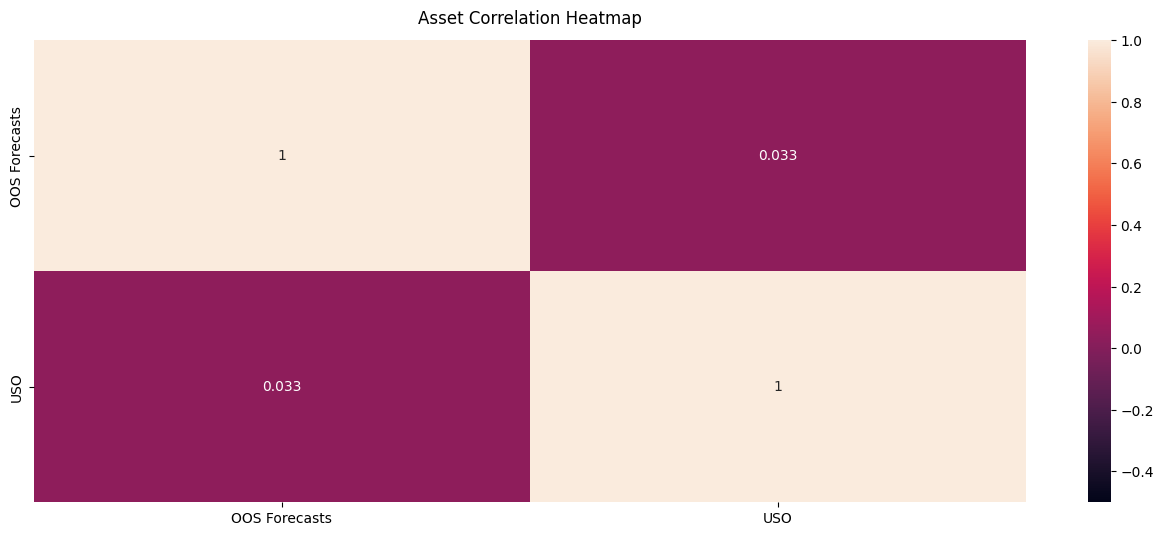

In [303]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(OOS_forecasted_rtn.corr(), vmin=-0.5, vmax=1, annot=True)
heatmap.set_title('Asset Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The forecasts,baseline and OOS, is positively correlated with the actual USO levels. Only considering the correlation data, the forecast is effective. However, the R^2 is negative and quite low which indicate that forecasting USO using Tnote rates and changes is not informative. 

### 8.

#### (7pts)

Convert your OOS forecast to a traded return strategy, using the same allocation rule as in part 2.

Report the following performance stats for the OOS forecast strategy.

* mean
* volatility
* max-drawdown

Compare these with the passive return, $r^\targ$ over the same OOS window.

In [288]:
performance_summary(forecasting[['USO']])

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recovery
USO,-0.0042,0.3626,-0.0116,-1.0166,5.7077,-0.1626,-0.2570,-0.9471,2011-04-30,2020-04-30,NaT


In [293]:
trading_oos_ret = OOS_forecasted_rtn.copy()
oos_trading = []
for cols in ['OOS Forecasts','Baseline Forecasts']:
    trading_oos_ret[cols] = (trading_oos_ret[cols])*50 + 0.2
    strat_rtn = pd.DataFrame(trading_oos_ret[cols] *OOS_forecasted_rtn.loc[:,['USO']]['USO'], columns=[cols+' Strat'], index=OOS_forecasted_rtn.index).dropna()
    oos_trading.append(strat_rtn.T)

oos_trading_rets = pd.concat(oos_trading).T
performance_summary(oos_trading_rets, annualization=12)

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recovery
OOS Forecasts Strat,0.0444,0.5190,0.0855,-1.3379,25.4674,-0.0798,-0.3143,-0.9008,2020-04-30,2020-09-30,NaT
Baseline Forecasts Strat,-0.0316,0.1167,-0.2708,-0.7594,18.0301,-0.0340,-0.0844,-0.3457,2020-04-30,2023-05-31,NaT


In [291]:
oos_lfd = []
for cols in ['OOS Forecasts','Baseline Forecasts']:
    fund_ret = oos_trading_rets[cols+ ' Strat']
    reg = regression_based_performance(trading_oos_ret['USO'],fund_ret,0,annualization=52)
    beta = reg[0][0]
    treynor_ratio = reg[1]
    information_ratio = reg[2]
    alpha = reg[3]
    r_squared = reg[4]
    oos_lfd.append(pd.DataFrame([[beta,treynor_ratio,information_ratio,alpha,r_squared]],columns=['Beta','Treynor Ratio','Information Ratio','Alpha','R-Squared'],index = ['LFD - '+cols]))

oos_lfd_df = pd.concat(oos_lfd)
oos_lfd_df

,Beta,Treynor Ratio,Information Ratio,Alpha,R-Squared
LFD - OOS Forecasts,-0.4485,-0.4288,0.3132,0.0060,0.1526
LFD - Baseline Forecasts,-0.1955,0.7007,-0.5353,-0.0016,0.5731


***

# 4. 

We examine FX carry for trading the Mexican peso $\frn$.
* Find the FX and risk-free rate data for this problem on sheet `fx_carry`. As before, these are spot FX prices quoted as USD per $\frn$.
* SOFR is the risk-free rate on USD, and $\frnrate$ is the risk-free rate for $\frn$.
* As in Homework 8, the data is provided such that any row’s date, $t$, is reporting $S_t$ and $r^f_{t,t+1}$.
That is, both of these are known at time t.

### 1.
#### (3pts)

Transform the data to **log** FX prices and **log** interest rates, just as we did in Homework 8.

$$\begin{align}
\fxspot_t & \equiv \ln\left(\FXspot_t\right)\\[3pt]
\rflogusd_{\wintt} & \equiv \ln\left(1+r^{\text{USD}}_{\wintt}\right)\\[3pt]
\rflogfrn_{\wintt} & \equiv \ln\left(1+r^{\frn}_{\wintt}\right)\\
\end{align}$$


Display the mean of all three series.

In [54]:
log_fx_daily = raw_data[sheets[2]].set_index('date')
log_fx_daily['MXN'] = np.log(fx_daily['MXN'])
log_fx_daily['SOFR'] =   np.log(1+fx_daily['SOFR'])
log_fx_daily['MXSTR'] =   np.log(1+fx_daily['MXSTR'])

log_fx_daily.mean().to_frame('Mean')

,Mean
MXN,-2.9813
SOFR,0.0001
MXSTR,0.0003


### 2.

Calculate the excess log return to a USD investor of holding $\frn$. Report the following **annualized** stats...
* Mean
* Volatility
* Sharpe ratio.

Assume there are 252 reported days per year for pursposes of annnualization.

In [59]:
fx_hldg_excess_ret = log_fx_daily['MXN'].diff() + log_fx_daily['MXSTR'].shift(1) - log_fx_daily['SOFR'].shift(1)
fx_hldg_summary = performance_summary(fx_hldg_excess_ret.to_frame().dropna(),annualization=252)
fx_hldg_summary.index = ['MXN']
fx_hldg_summary.index.name = 'Currency Held'
fx_hldg_summary

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recovery
Currency Held,,,,,,,,,,,
MXN,0.0667,0.1286,0.5186,-0.7722,6.3175,-0.0131,-0.0202,-0.2615,2020-02-14,2020-03-23,2022-03-24


### 3. 

Over the sample, was it better to be long or short $\frn$ relative to USD?
* Did the interest spread help on average?
* Did the USD appreciate or depreciate relative to $\frn$ over the sample?

Over the sample, a long position in GBP would have offered positive returns. Thus it was better to be long MXN relative to USD. 

Over the sample, the average interest rate spread between USD and MXN (MXN - USD) was positive and thus did help an investor holding MXN. 

Over the sample, the MXN-USD exchange rate increased, indicating that the USD deppreciated relative to MXN. 


In [60]:
pd.DataFrame([[(log_fx_daily['MXSTR'].shift(1) - log_fx_daily['SOFR'].shift(1)).mean()]],columns = ['Mean'], index=['Interest Rate Spread'])

,Mean
Interest Rate Spread,0.0002


### 4.

#### (7pts)

Forecast the growth of the FX rate using the interest-rate differential:

$$\fxspot_{t+1} - \fxspot_t = \alpha + \beta\left(\rflogusd_{\wintt} - \rflogfrn_{\wintt}\right) + \epsilon_{t+1}$$

Report the following OLS stats, (no need to annualize or scale them.)
* $\alpha$
* $\beta$
* r-squared

In [61]:
factor = log_fx_daily['SOFR'].shift(1) - log_fx_daily['MXSTR'].shift(1)
strat = log_fx_daily['MXN'].diff()
reg = regression_based_performance(factor,strat,0,annualization = 1)
beta_currency = reg[0][0]
treynor_ratio = reg[1]
information_ratio = reg[2]
alpha = reg[3]
r_squared = reg[4]
fx_hldg_reg_summary = pd.DataFrame([[alpha,beta_currency,r_squared]],columns=['Alpha','Beta','R-Squared'],index = ['MXN'])
fx_hldg_reg_summary

,Alpha,Beta,R-Squared
MXN,0.0012,5.4428,0.0004


### 5. 

If we assume the Uncovered Interest Parity to hold true, what would you expect to be true of the regression estimates?

UIP states that the change in the spot fx rate would be completely explained by the changes in risk free rates. Thus, we would expect : beta to be 1. alpha to be 0. We would have NO insight about the R^2. This is only a theory about averages, so no implication on  𝑅2

### 6.

Based on the regression results, if we observe an increase in the interest rate on USD relative to $\frn$, should we expect the USD to get stronger (appreciate) or weaker (depreciate)?

A strengthening U.S. dollar means that it now buys more of the other currency than it did before.If risk-free rate of a currency were to increase relative to the US rate, the currencies with a negative beta in the previous regression would see a decrease in the fx rates (USD per foreign currency). This indicates that there will be a relative weakening of the USD as a dollar would now buy more of those currencies. MXN has a negative beta to USD. Thus, USD would experience a relative weakening relative to MXN. 

From the regression, if MXSTR gets bigger relative to SOFR, regressor is getting more negative. Previous estimated beta is negative, so combined with decreasing regressor, we expect left-hand-side gets bigger. That is to say, FX rate gets bigger, which means dollar is depreciating (weakening.)

### 7.

If the risk free rates in $\frn$ increase relative to risk-free rates in USD, do we expect the forward exchange rate to be higher than the spot exchange rate?

According to Interest rate parity, a currency with lower interest rates will trade at a forward premium in relation to a currency with a higher interest rate. Thus if the risk free rates in USD increase relative to risk-free rates in MXN, we expect the forward exchange rate to be higher than the spot exchange rate. 

### 8.

Do you think the estimated forecast impact of rates on currency returns would be larger over an annual horizon instead of a daily horizon? Why?

the estimated forecast impact of rates on currency returns would be larger over an annual horizon instead of a daily horizon. Accumulated Interest Differential: Over an annual horizon, the interest rate differential between two currencies accumulates, resulting in a more significant impact on currency returns. Investors holding a higher-yielding currency over a year will earn a more substantial interest income compared to a daily investment. This accumulated interest income can influence the overall return on the investment and contribute to a larger impact on currency returns.

***